# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2024-04-29 12:05:02--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [       <=>          ] 879.65M  7.57MB/s    in 1m 58s  

2024-04-29 12:07:01 (7.43 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [ ]:
!gunzip SUSY.csv.gz

In [5]:
ls -lh

total 2.3G
-rw-r--r-- 1 youngsai youngsai  29K Feb 24 05:18 Lab.2_SaigeYoung.ipynb
-rw-r--r-- 1 youngsai youngsai  33K Feb 25 15:44 Lab.3_SaigeYoung.ipynb
-rw-r--r-- 1 youngsai youngsai 7.5K Mar  3 14:46 Lab.4_SaigeYoung.ipynb
-rw-r--r-- 1 youngsai youngsai 4.6K Mar 22 11:47 Lab.5.ipynb
-rw-r--r-- 1 youngsai youngsai 4.8K Mar 22 11:47 Lab.6.ipynb
-rw-r--r-- 1 youngsai youngsai 387K Mar 22 11:45 Lab.7SaigeYoung.ipynb
-rw-r--r-- 1 youngsai youngsai 2.3G Mar 22 11:44 SUSY.csv


The data is provided as a comma separated file.

In [2]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [3]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [4]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [5]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [6]:
FeatureNames

['M_R',
 'R',
 'dPhi_r_b',
 'cos_theta_r1',
 'M_TR_2',
 'axial_MET',
 'S_R',
 'M_Delta_R',
 'MET_rel',
 'MT2']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/tmp/ipykernel_224593/2225940201.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Now we can read the data into a pandas dataframe:

In [8]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [9]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [10]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


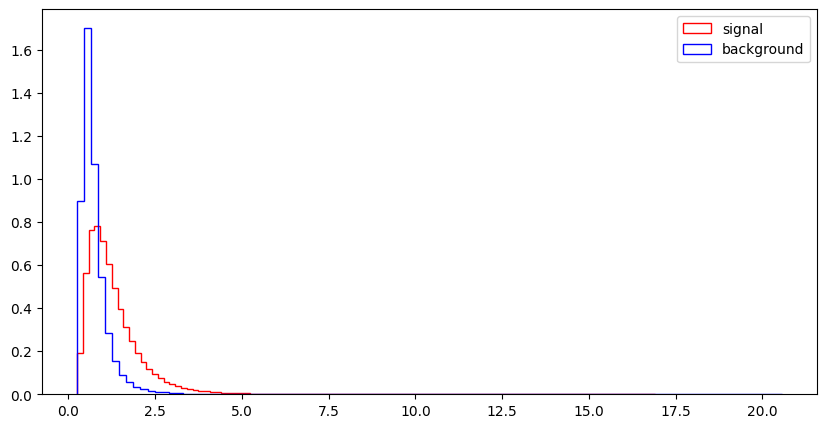

l_1_eta


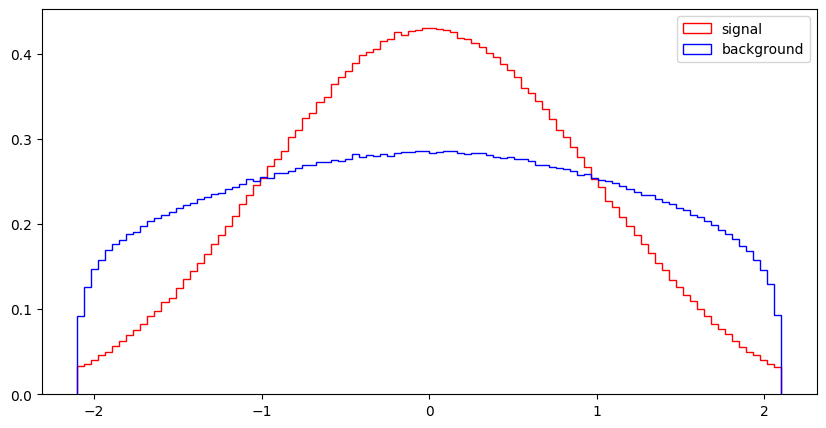

l_1_phi


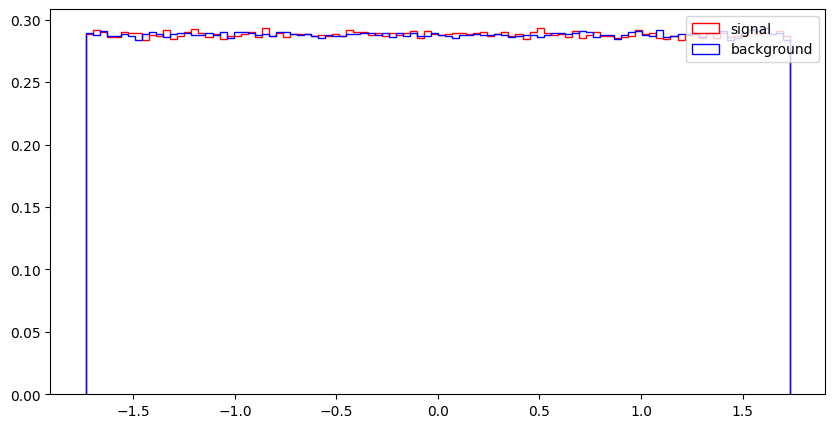

l_2_pT


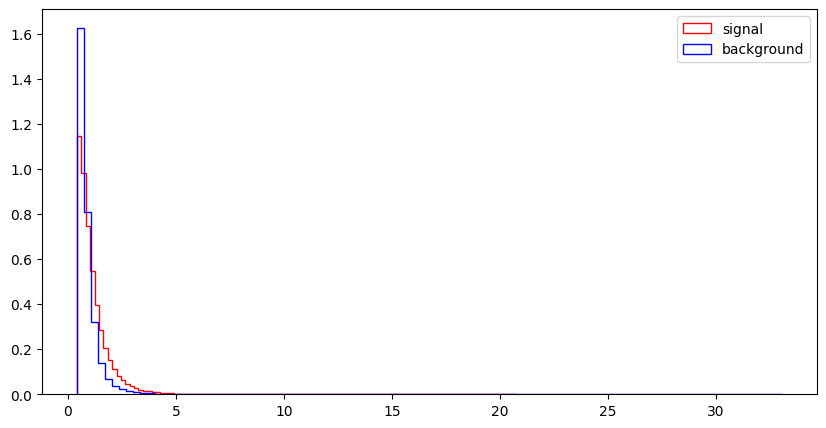

l_2_eta


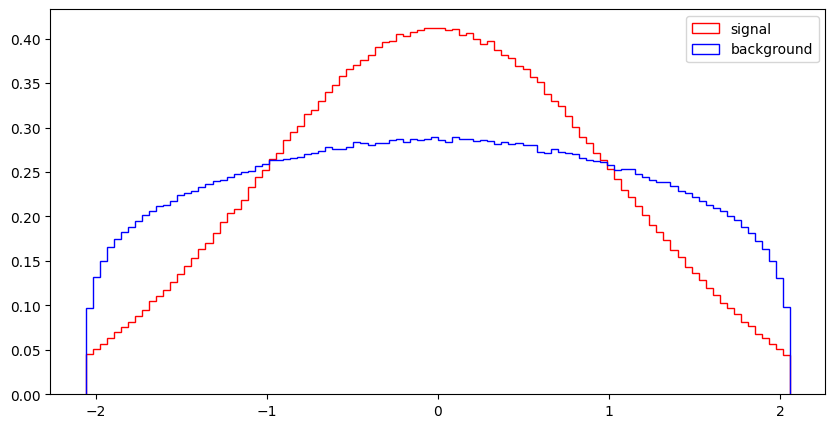

l_2_phi


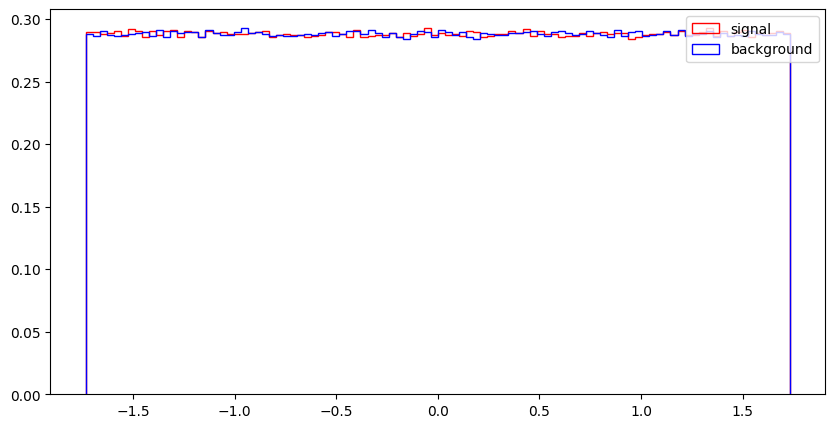

MET


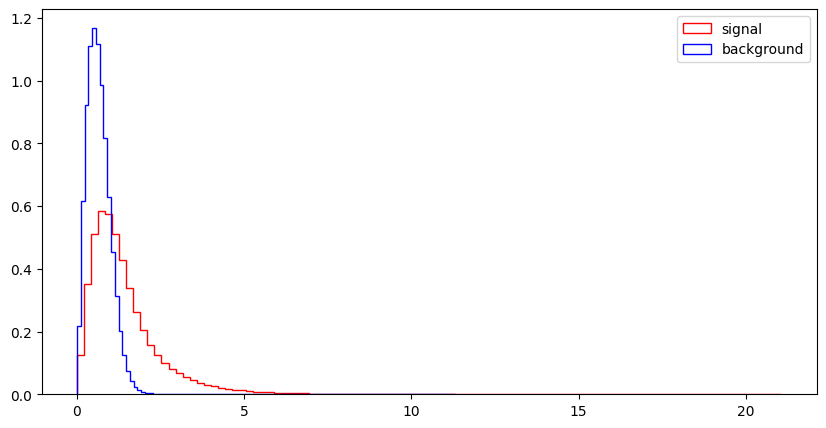

MET_phi


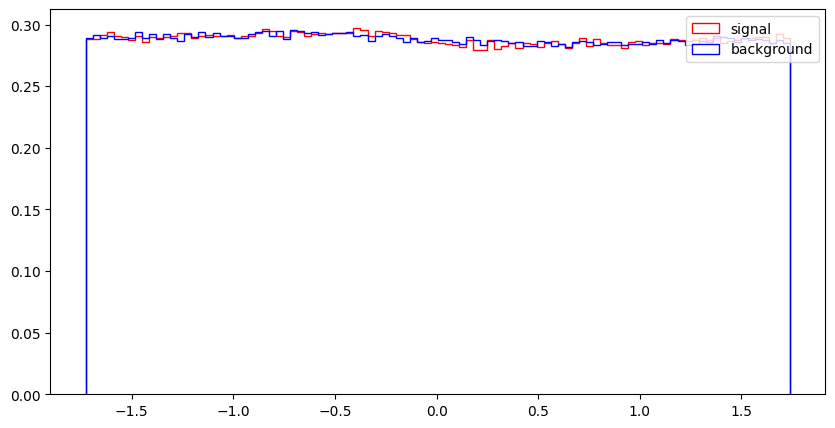

MET_rel


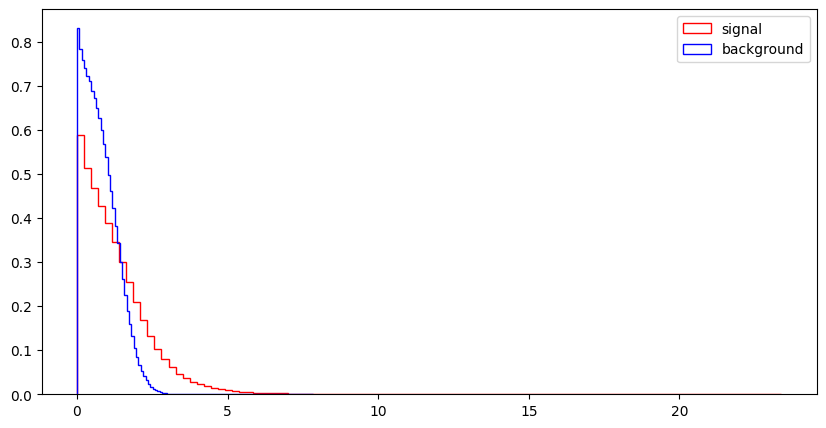

axial_MET


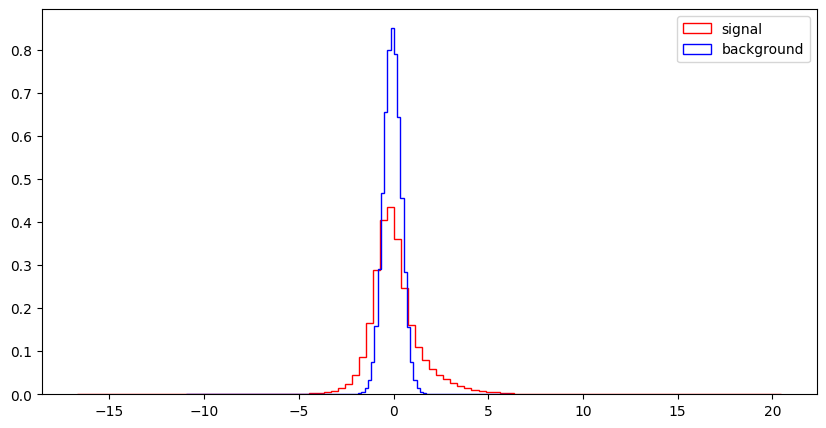

M_R


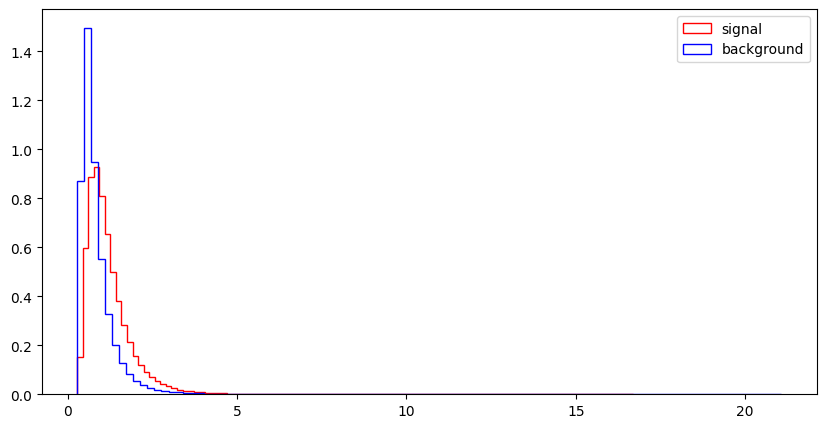

M_TR_2


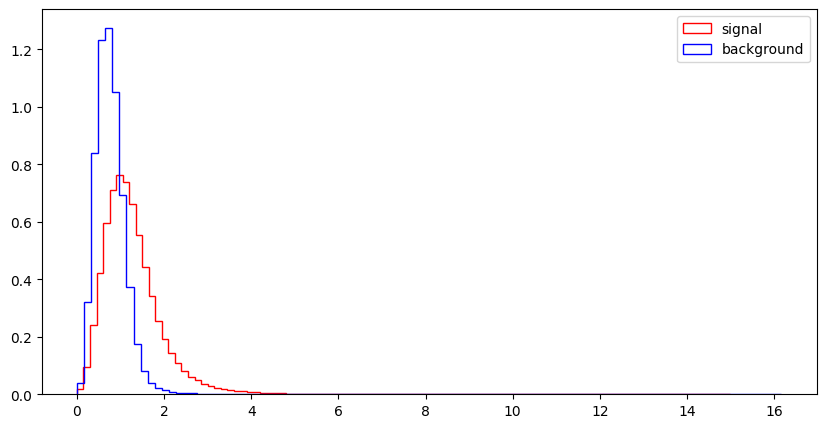

R


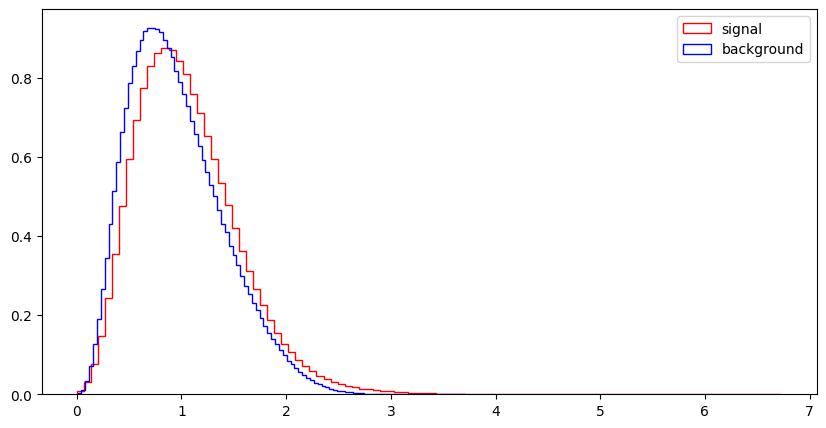

MT2


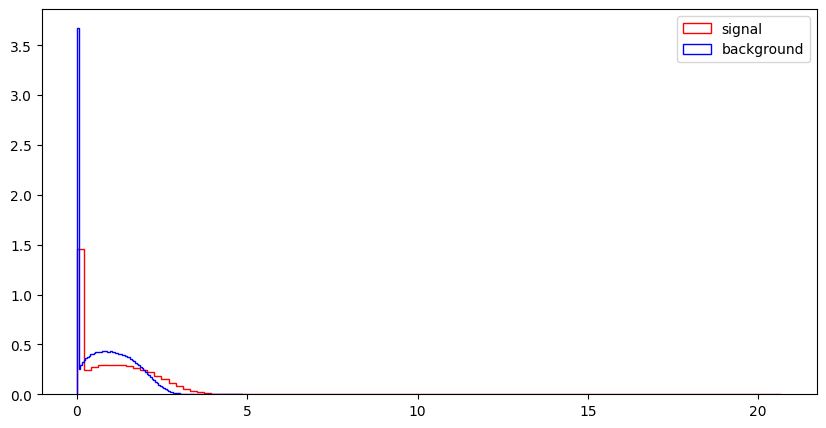

S_R


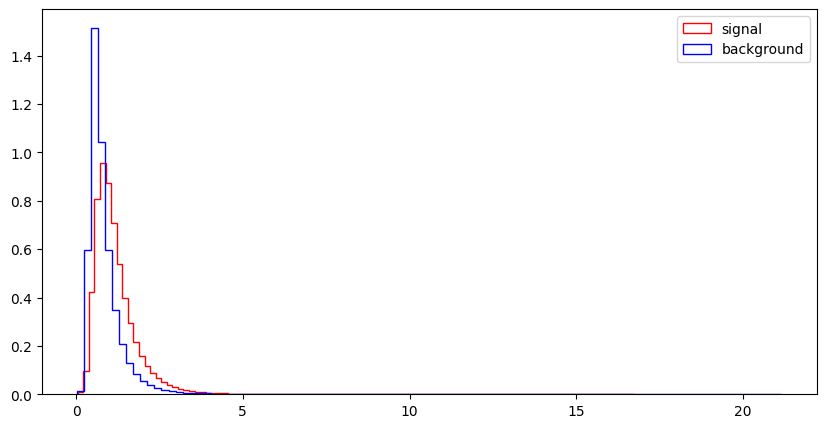

M_Delta_R


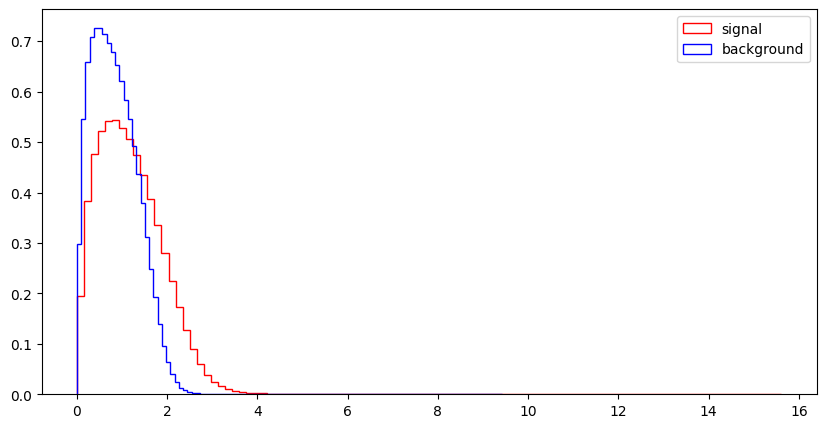

dPhi_r_b


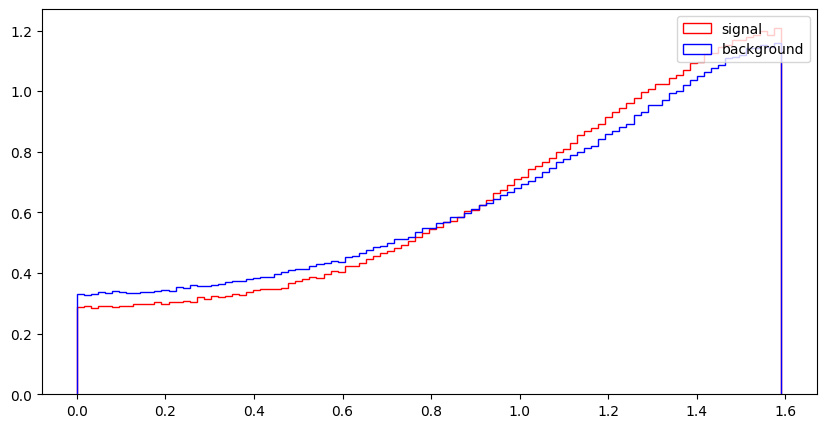

cos_theta_r1


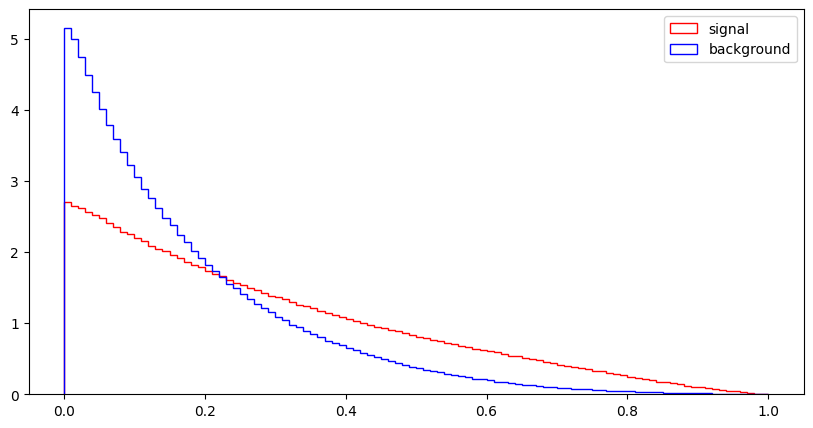

In [11]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

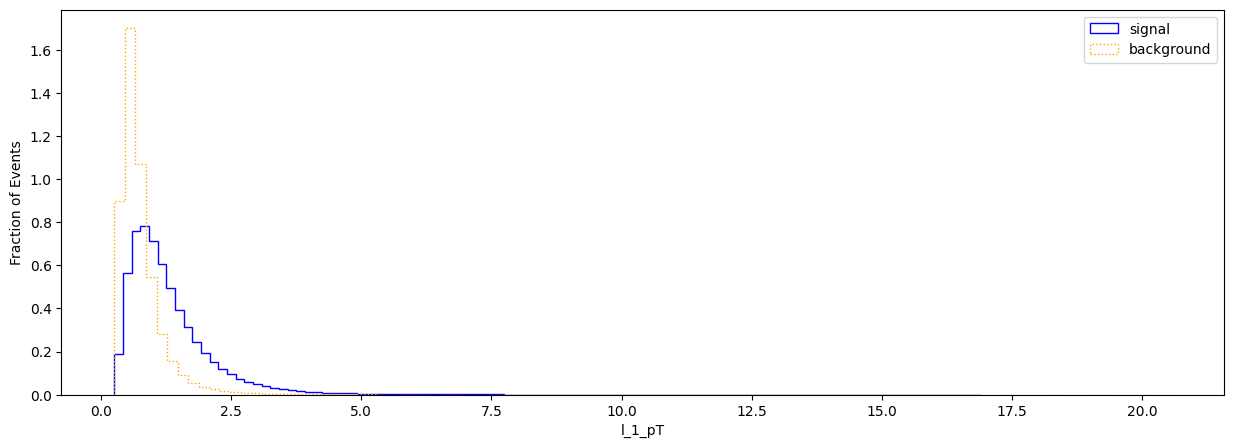

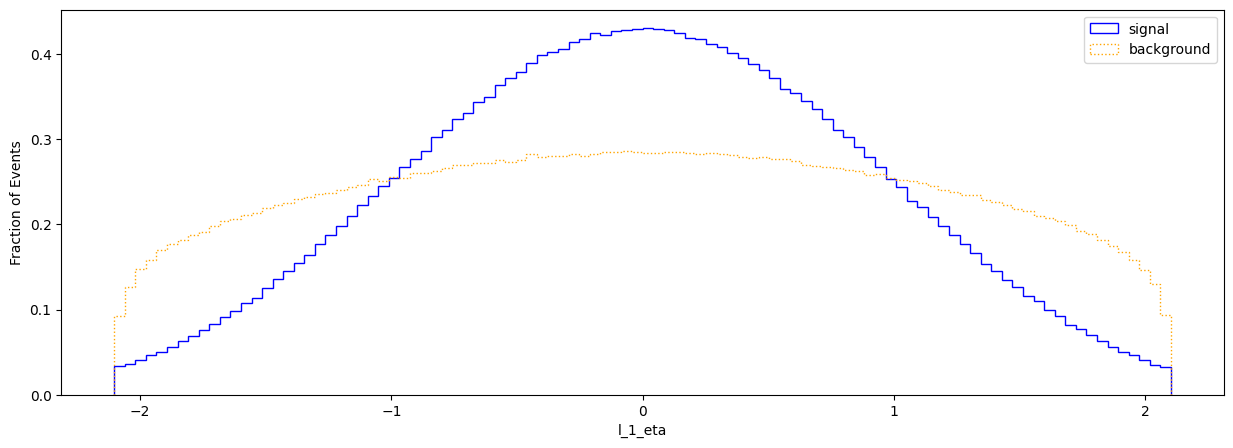

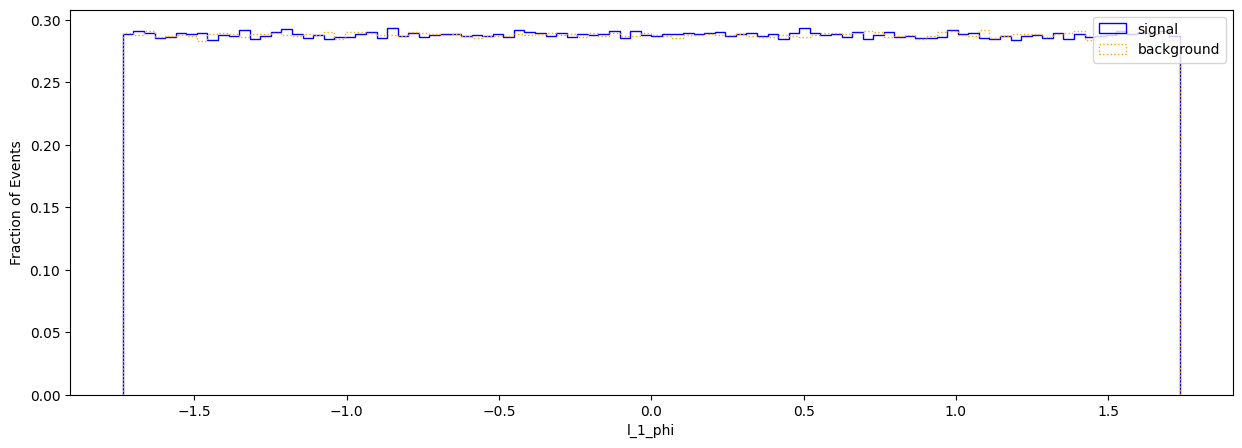

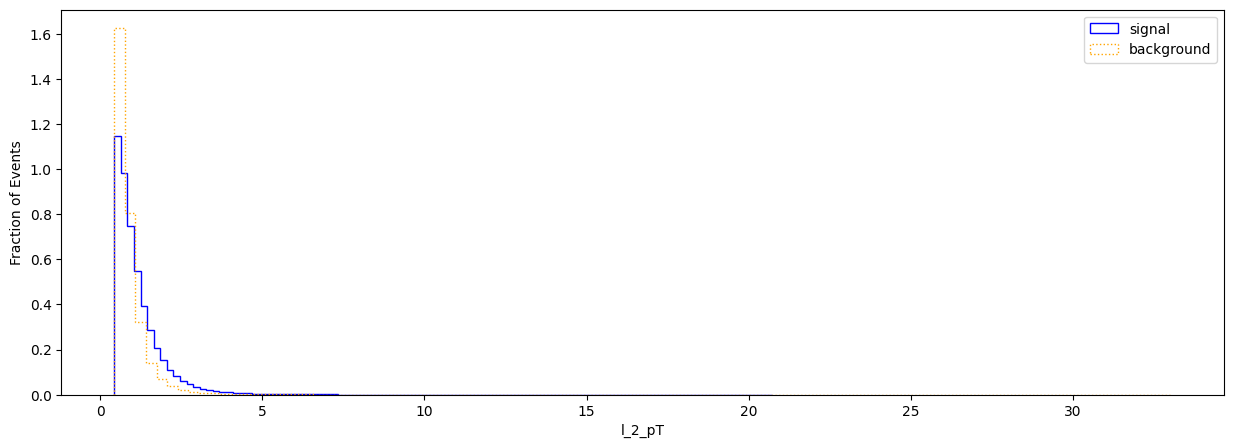

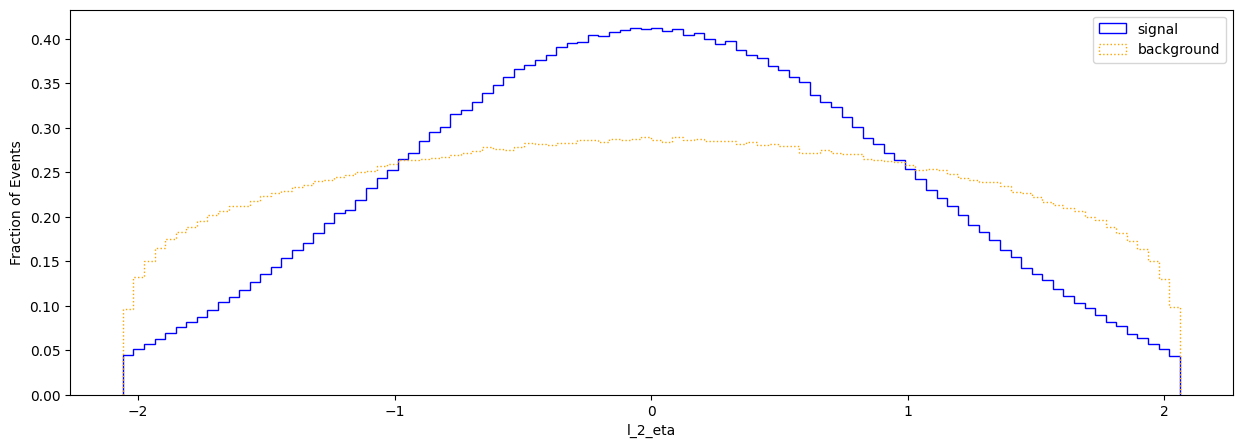

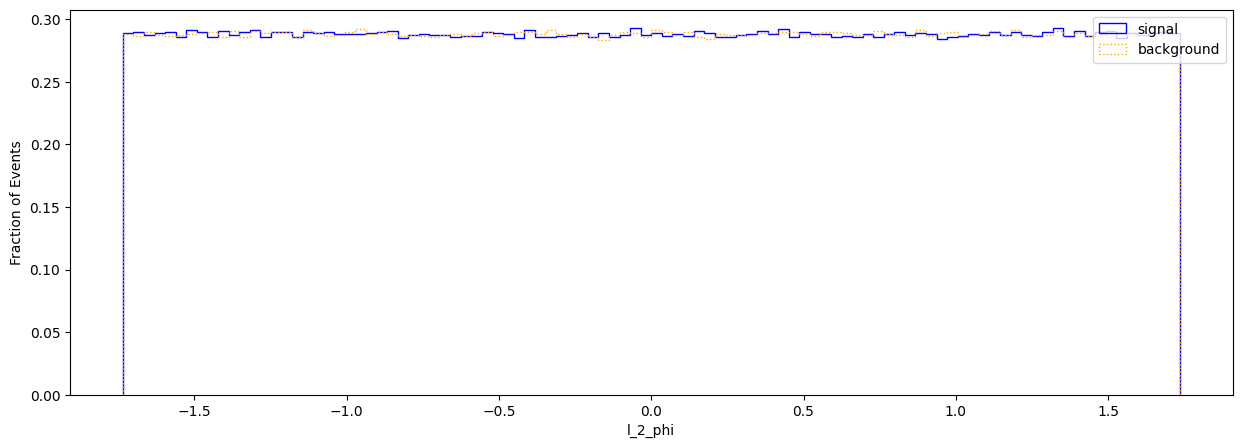

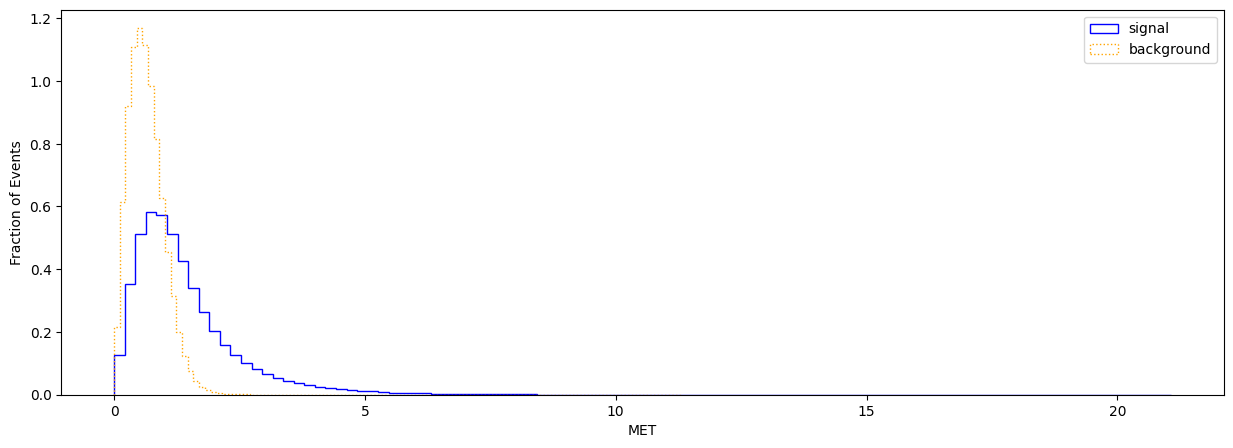

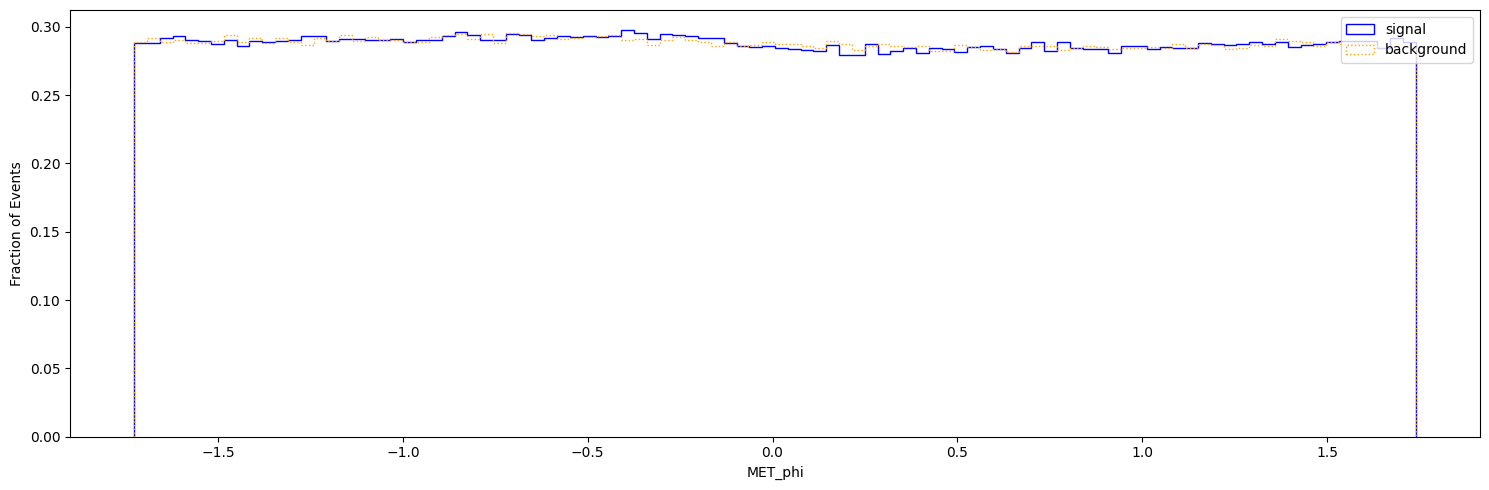

In [12]:
#figure 5 (low-level)
for var in RawNames:
    plt.figure(figsize=(15,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="blue",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="orange", label="background",density=1, stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')
    plt.xlabel(var)
    plt.ylabel('Fraction of Events')

plt.tight_layout()
plt.show()

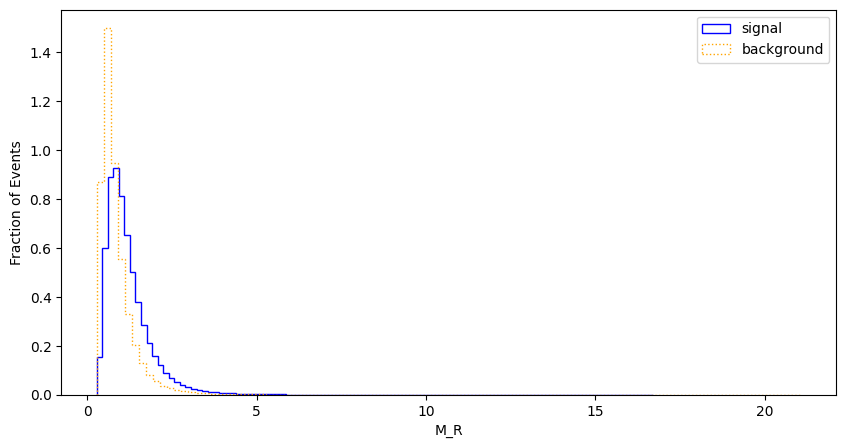

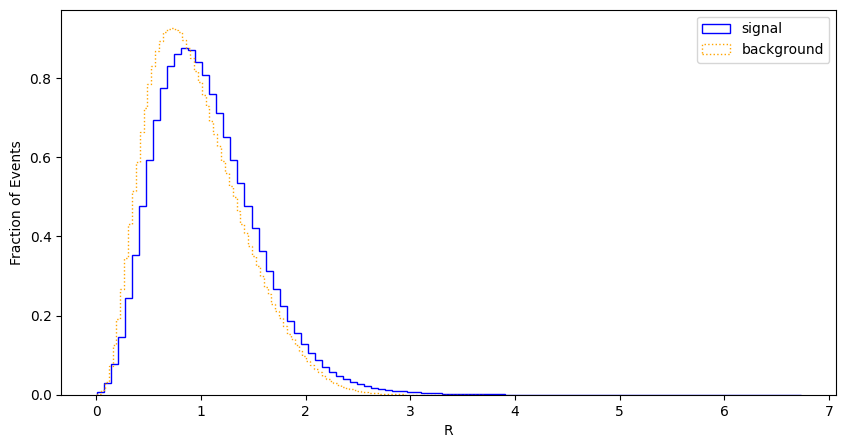

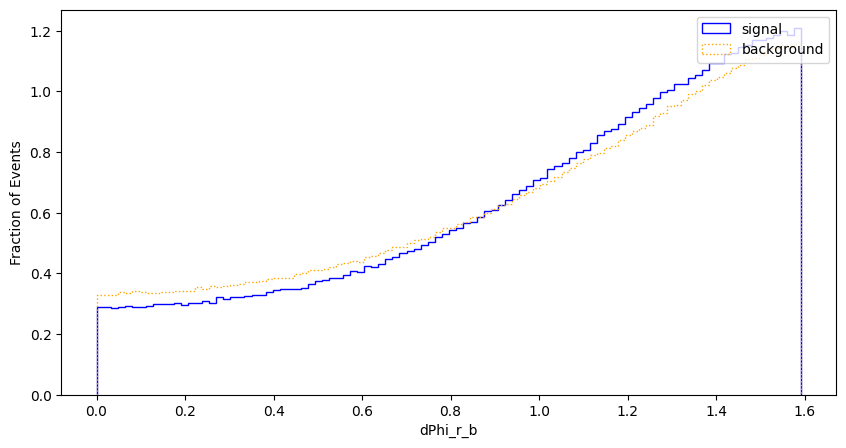

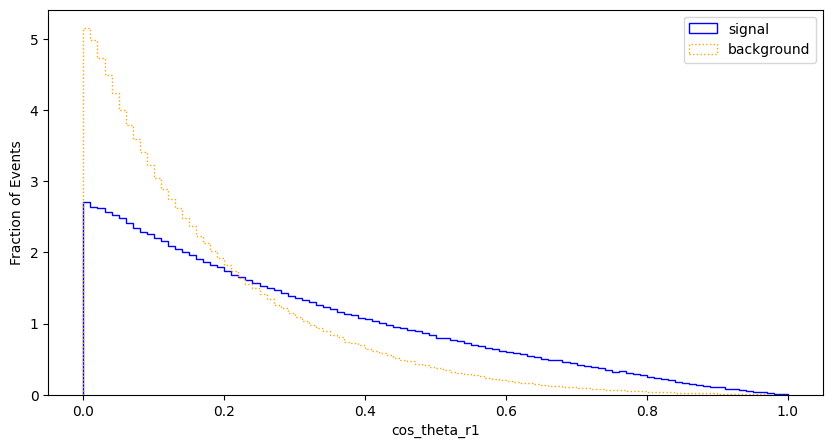

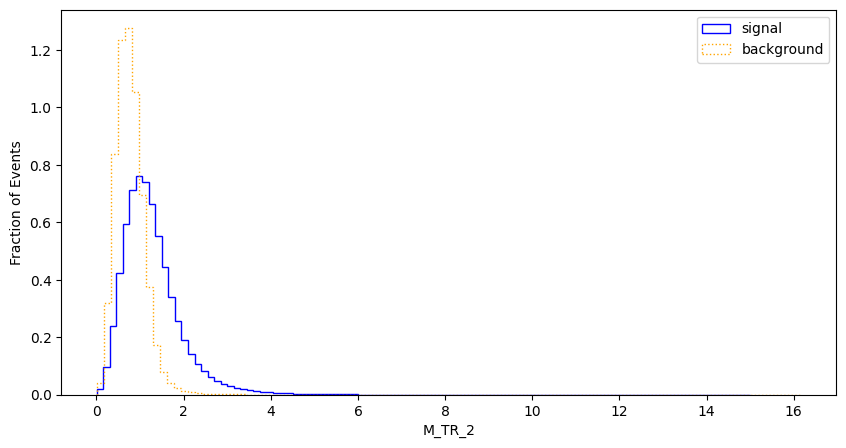

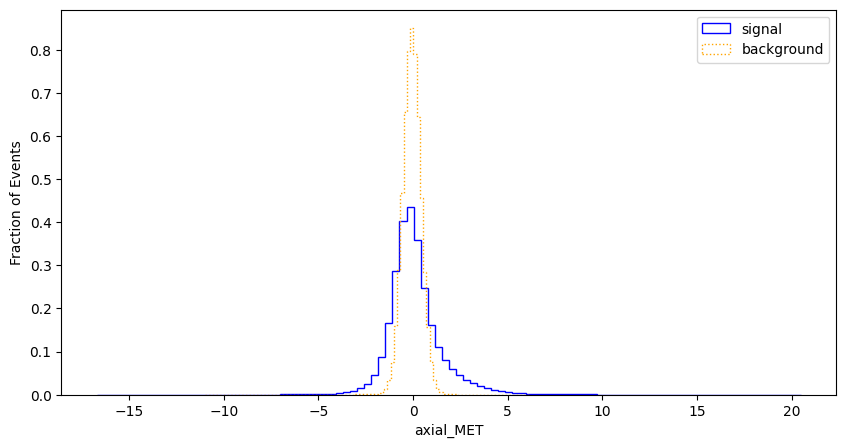

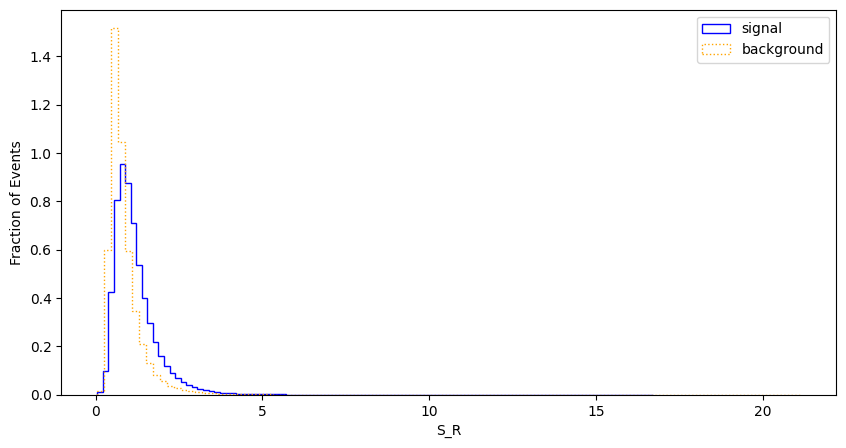

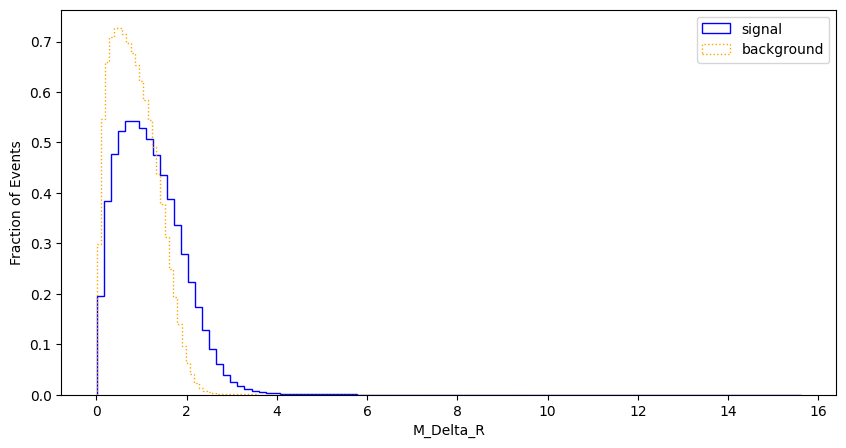

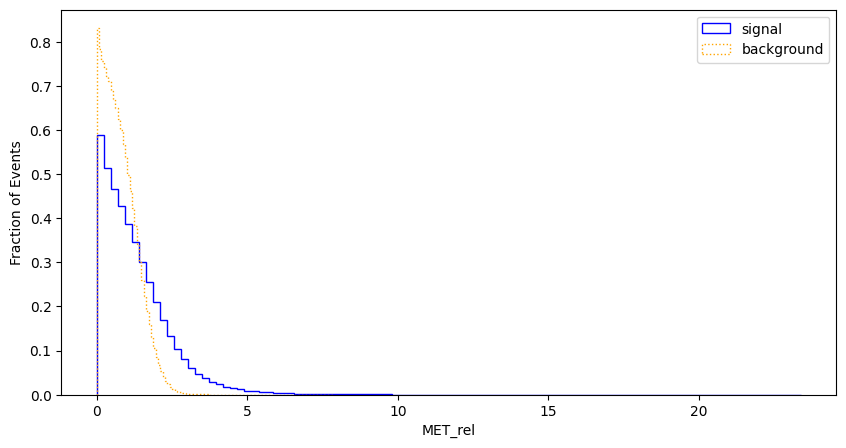

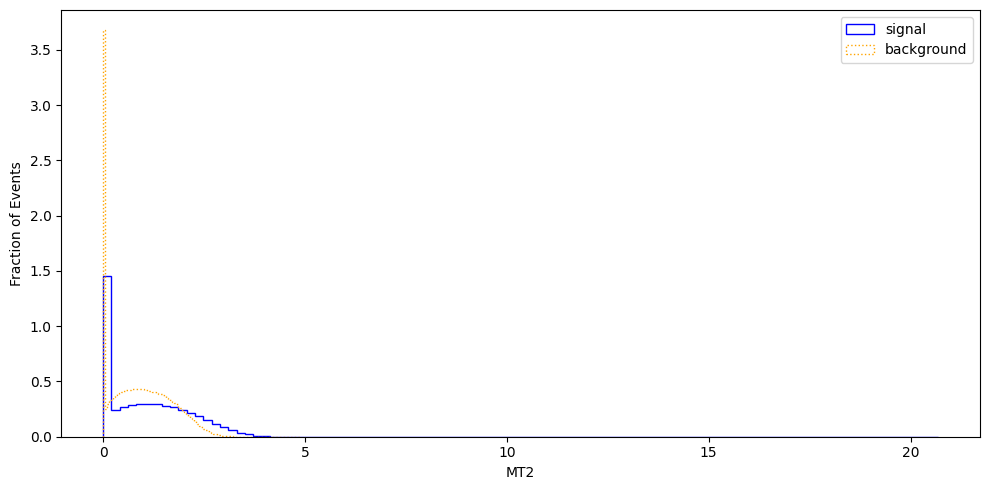

In [13]:
# Figure 6 (High-level)
for var in FeatureNames:
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="blue",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="orange", label="background",density=1, stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')
    plt.xlabel(var)
    plt.ylabel('Fraction of Events')

plt.tight_layout()
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [14]:
#comparing plots
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label)

    _=plt.legend()
    
def compare_scatter(df,x_var_name,y_var_name,selections,make_legend=True) :
    for label,selection in selections.items():   
        _=plt.scatter(df[selection][x_var_name],df[selection][y_var_name],label=label)

    _=plt.xlabel(x_var_name)
    _=plt.ylabel(y_var_name)

    if make_legend:
        _=plt.legend()

def compare_hist(df,var1,var2):
    sig=df[df.signal==1]
    bkg=df[df.signal==0]
    
    plt.hist(np.array(df_sig[var1]),bins=100,histtype="step", color="blue",label=var1,density=1, stacked=True)
    plt.hist(np.array(df_sig[var2]),bins=100,histtype="step", color="orange", label=var2,density=1, stacked=True)
    plt.hist(np.array(df_bkg[var1]),bins=100,histtype="step", color="blue",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var2]),bins=100,histtype="step", color="orange",density=1, stacked=True)
    plt.legend(loc='upper right')

def pairplot(df, columns):
    df_small=df.head(2000)
    selection_dict={"Background":df_small["signal"]==2.,"Signal":df_small["signal"]!=2}
    
    n_columns=len(columns)
    plt.figure(figsize=(10,10))

    plot_i=0
    for i,x_var_name in enumerate(columns):
        for j,y_var_name in enumerate(columns):
            plot_i+=1
            plt.subplot(n_columns,n_columns,plot_i)
            if i==j:
                compare_distributions(df_small,x_var_name,
                         selection_dict,
                         alpha=0.5,
                         density=1,
                         bins=100,
                         )
            else:
                compare_hist(df_small,x_var_name,y_var_name)

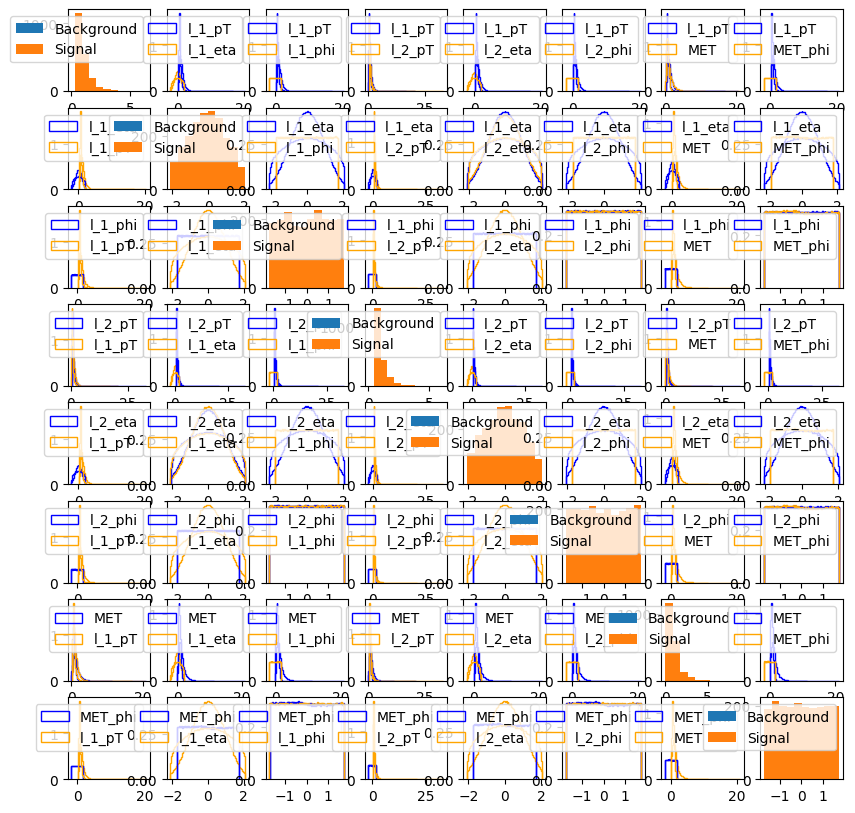

In [15]:
pairplot(df, RawNames)

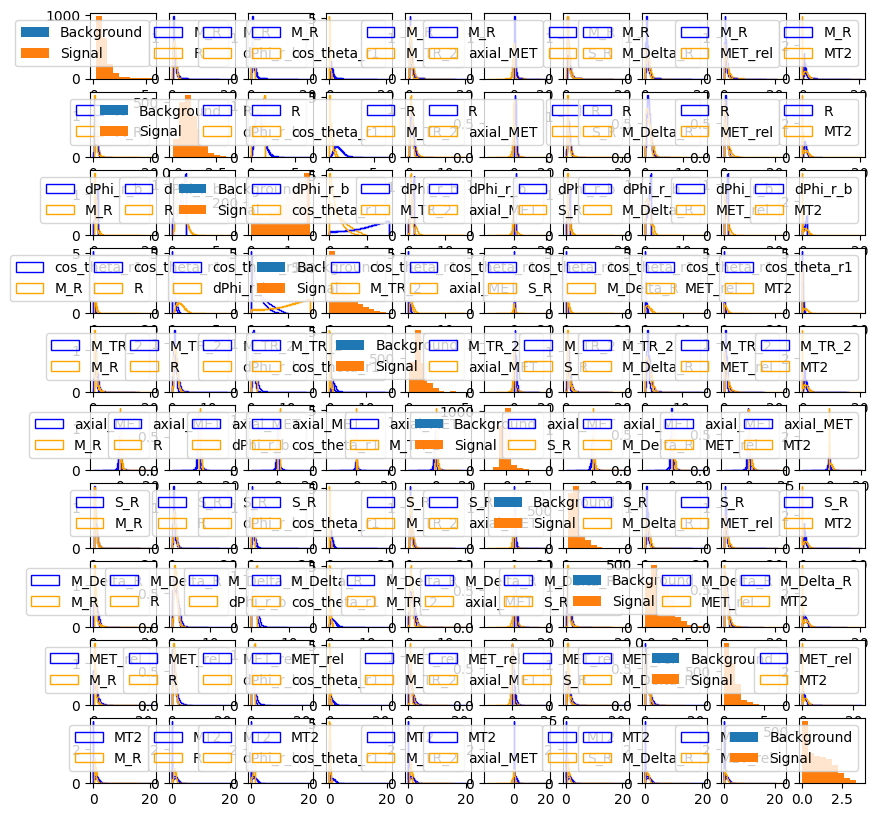

In [16]:
pairplot(df, FeatureNames)

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [17]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [19]:
def relation_mat(df, columns, type='co'):
    if type=='cov':
        table=np.cov(df, rowvar=False).tolist()
        for i in range(len(table)): table[i].insert(0,columns[i])
        return tabulate.tabulate(table, tablefmt='html', headers=columns)
    elif type=='corrcoef':
        table=np.corrcoef(df, rowvar=False).tolist()
        for i in range(len(table)): table[i].insert(0,columns[i])
        return tabulate.tabulate(table, tablefmt='html', headers=columns)
    else: 
        print('Invalid')

df_small=df.head(2000)
df_low=df_small[RawNames]
df_high=df_small[FeatureNames]

In [20]:
#covariance for low-level features
relation_mat(df_low, RawNames, type='cov')

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.428669,-0.012675,-0.012647,0.248319,0.0385261,-0.00245656,0.216378,0.00451368
l_1_eta,-0.012675,0.995271,0.0281013,-0.00923045,0.364163,-0.0255202,0.0166072,-0.00950311
l_1_phi,-0.012647,0.0281013,0.999178,0.00859174,0.015925,-0.286159,0.000911119,-0.181058
l_2_pT,0.248319,-0.00923045,0.00859174,0.351503,0.0269241,-0.0116433,0.0800948,-0.00154157
l_2_eta,0.0385261,0.364163,0.015925,0.0269241,1.0156,-0.0458505,0.0447504,-0.00892686
l_2_phi,-0.00245656,-0.0255202,-0.286159,-0.0116433,-0.0458505,1.01957,-0.0214168,-0.0518184
MET,0.216378,0.0166072,0.000911119,0.0800948,0.0447504,-0.0214168,0.689698,0.0115671
MET_phi,0.00451368,-0.00950311,-0.181058,-0.00154157,-0.00892686,-0.0518184,0.0115671,0.998429


In [21]:
#covariance for high-level features
relation_mat(df_high, FeatureNames, type='cov')

,M_R,R,dPhi_r_b,cos_theta_r1,M_TR_2,axial_MET,S_R,M_Delta_R,MET_rel,MT2
M_R,0.361296,-0.115387,-0.0295857,-0.0151541,0.185086,0.0479921,0.344836,0.0705556,0.0558914,-0.0409158
R,-0.115387,0.227761,0.0855357,0.0588335,0.105955,-0.200796,-0.0855628,0.16871,0.245751,0.246225
dPhi_r_b,-0.0295857,0.0855357,0.193068,0.00649415,0.0578854,-0.0405466,-0.00292002,0.0441769,0.148719,0.0301935
cos_theta_r1,-0.0151541,0.0588335,0.00649415,0.0399053,0.0509671,-0.0604211,-0.0117725,0.0397491,0.0514013,0.0475971
M_TR_2,0.185086,0.105955,0.0578854,0.0509671,0.315658,-0.183919,0.200375,0.239666,0.305249,0.199228
axial_MET,0.0479921,-0.200796,-0.0405466,-0.0604211,-0.183919,0.980757,-0.0134516,-0.249456,-0.190459,-0.463153
S_R,0.344836,-0.0855628,-0.00292002,-0.0117725,0.200375,-0.0134516,0.343013,0.0899394,0.0930644,-0.0148799
M_Delta_R,0.0705556,0.16871,0.0441769,0.0397491,0.239666,-0.249456,0.0899394,0.385328,0.406781,0.438266
MET_rel,0.0558914,0.245751,0.148719,0.0514013,0.305249,-0.190459,0.0930644,0.406781,0.748138,0.43068
MT2,-0.0409158,0.246225,0.0301935,0.0475971,0.199228,-0.463153,-0.0148799,0.438266,0.43068,0.736187


In [22]:
# Correlation for low-level features
relation_mat(df_low, RawNames, type='corrcoef')

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.0194051,-0.0193244,0.639711,0.058389,-0.00371585,0.397944,0.00689939
l_1_eta,-0.0194051,1,0.0281796,-0.0156059,0.362212,-0.0253341,0.0200445,-0.00953315
l_1_phi,-0.0193244,0.0281796,1,0.0144976,0.0158087,-0.283516,0.00109755,-0.181275
l_2_pT,0.639711,-0.0156059,0.0144976,1,0.0450624,-0.0194493,0.162671,-0.00260219
l_2_eta,0.058389,0.362212,0.0158087,0.0450624,1,-0.0450582,0.0534693,-0.00886498
l_2_phi,-0.00371585,-0.0253341,-0.283516,-0.0194493,-0.0450582,1,-0.0255398,-0.0513591
MET,0.397944,0.0200445,0.00109755,0.162671,0.0534693,-0.0255398,1,0.0139391
MET_phi,0.00689939,-0.00953315,-0.181275,-0.00260219,-0.00886498,-0.0513591,0.0139391,1


In [23]:
# Correlation for high-level features
relation_mat(df_high, FeatureNames, type='corrcoef')

,M_R,R,dPhi_r_b,cos_theta_r1,M_TR_2,axial_MET,S_R,M_Delta_R,MET_rel,MT2
M_R,1,-0.402242,-0.11202,-0.126207,0.548065,0.0806226,0.979547,0.189097,0.107503,-0.079335
R,-0.402242,1,0.407899,0.617121,0.395159,-0.424848,-0.306119,0.56949,0.59534,0.60131
dPhi_r_b,-0.11202,0.407899,1,0.0739864,0.23448,-0.0931791,-0.0113469,0.161967,0.391309,0.0800874
cos_theta_r1,-0.126207,0.617121,0.0739864,1,0.454115,-0.305416,-0.100623,0.320551,0.297487,0.277697
M_TR_2,0.548065,0.395159,0.23448,0.454115,1,-0.33055,0.608947,0.687199,0.628138,0.413283
axial_MET,0.0806226,-0.424848,-0.0931791,-0.305416,-0.33055,1,-0.023192,-0.405788,-0.222347,-0.545067
S_R,0.979547,-0.306119,-0.0113469,-0.100623,0.608947,-0.023192,1,0.247389,0.183712,-0.0296108
M_Delta_R,0.189097,0.56949,0.161967,0.320551,0.687199,-0.405788,0.247389,1,0.757626,0.822864
MET_rel,0.107503,0.59534,0.391309,0.297487,0.628138,-0.222347,0.183712,0.757626,1,0.580323
MT2,-0.079335,0.60131,0.0800874,0.277697,0.413283,-0.545067,-0.0296108,0.822864,0.580323,1


In [24]:
##some of my code is taken from lecture 
##its a little all over the place but the questions should all be answered.

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [25]:
#from lecture
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

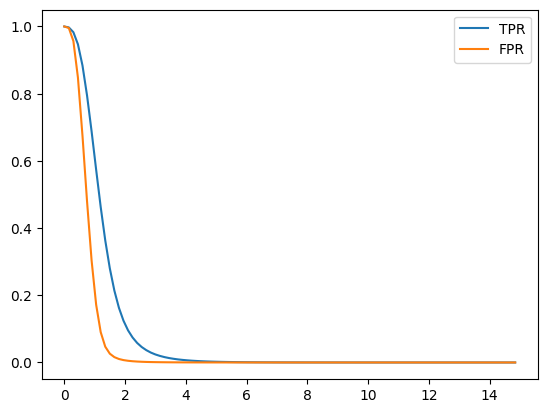

In [26]:
TPR,bins=compute_rate(df_sig["M_TR_2"])
FPR,bins=compute_rate(df_bkg["M_TR_2"],bins=bins)

plt.plot(bins[:-1],TPR,label="TPR")
plt.plot(bins[:-1],FPR,label="FPR")
plt.legend()

In [27]:
def compute_rate_1(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

def compute_rate_2(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist) * (bins_[1]-bins_[0])
    return R,bins_

(array([ 53127., 126274., 229160., 333589., 401544., 401106., 334161.,
        228592., 127129.,  53145.]),
 array([-2.10291862e+00, -1.68246710e+00, -1.26201558e+00, -8.41564059e-01,
        -4.21112537e-01, -6.61015511e-04,  4.19790506e-01,  8.40242028e-01,
         1.26069355e+00,  1.68114507e+00,  2.10159659e+00]),
 <BarContainer object of 10 artists>)

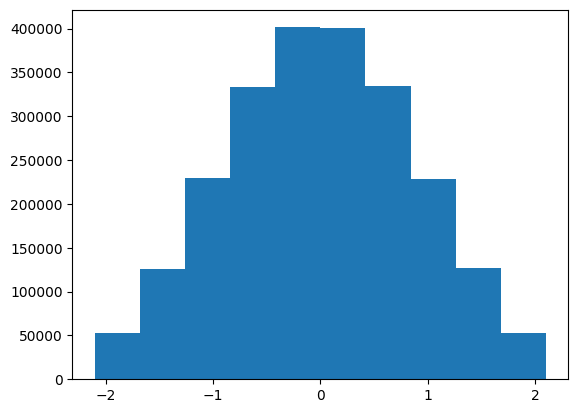

In [28]:
plt.hist(df_sig["l_1_eta"])

(array([329754., 335882., 338251., 316553., 295960., 249267., 188562.,
        125862.,  72500.,  35236.]),
 array([1.81198120e-06, 3.20293493e-01, 6.40585175e-01, 9.60876856e-01,
        1.28116854e+00, 1.60146022e+00, 1.92175190e+00, 2.24204358e+00,
        2.56233526e+00, 2.88262694e+00, 3.20291862e+00]),
 <BarContainer object of 10 artists>)

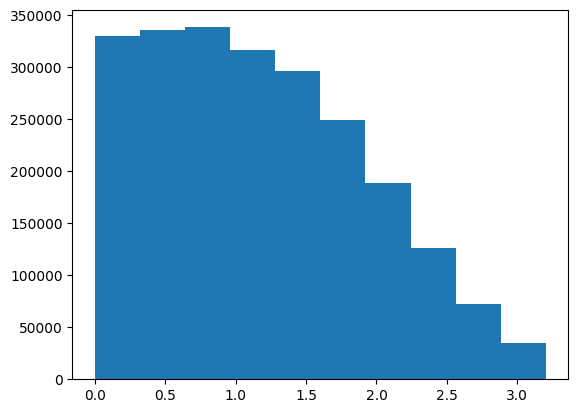

In [29]:
plt.hist(np.abs(df_sig["l_1_eta"]-1.1))

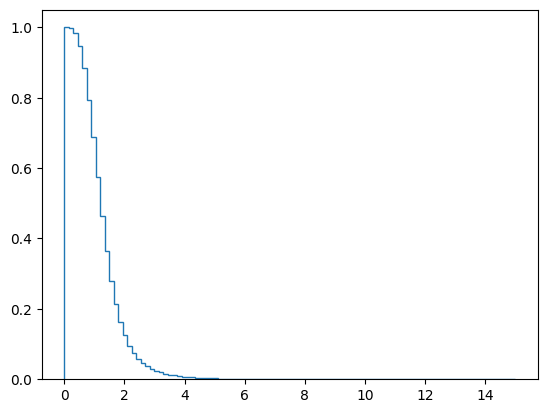

In [53]:
TPR,bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=-1,density=True)

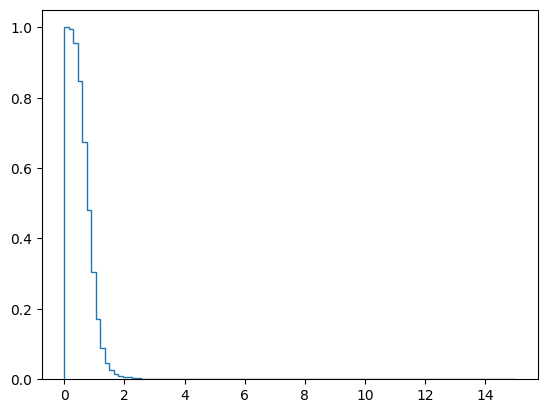

In [54]:
FPR,bins_sig,_=plt.hist(df_bkg["M_TR_2"],bins=bins_sig,histtype="step",cumulative=-1,density=True)

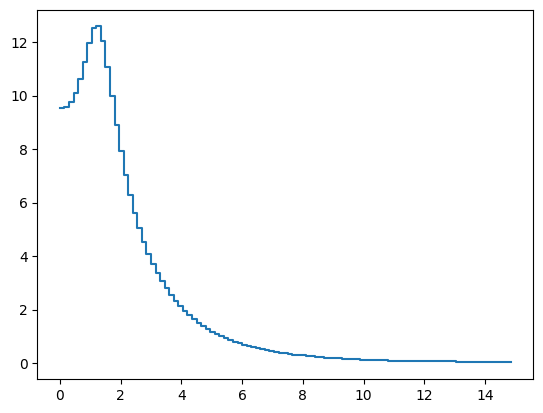

In [55]:
n_bkg_expected = 10000
n_sig_expected = 1000

n_sig_expected_prime = n_sig_expected * TPR
n_bkg_expected_prime = n_bkg_expected * FPR

sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
plt.step(bins_sig[:-1],sig)

In [56]:
bins_sig[np.argmax(sig)]

1.350293831230374

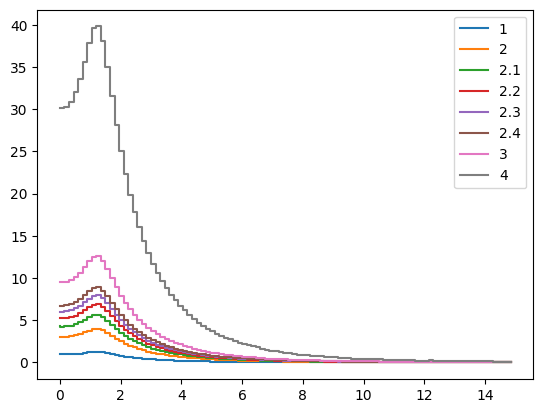

{'1': (9,
  3.6321277788923725,
  4.698005878683211,
  1.258447591175229,
  1.350293831230374),
 '2': (9,
  36.32127778892372,
  46.9800587868321,
  3.9795607040661367,
  1.350293831230374),
 '2.1': (9,
  72.64255557784745,
  93.9601175736642,
  5.627948719977353,
  1.350293831230374),
 '2.2': (9,
  108.96383336677117,
  140.9401763604963,
  6.892801331247122,
  1.350293831230374),
 '2.3': (9,
  145.2851111556949,
  187.9202351473284,
  7.959121408132273,
  1.350293831230374),
 '2.4': (9,
  181.6063889446186,
  234.90029393416052,
  8.898568254878805,
  1.350293831230374),
 '3': (9,
  363.2127778892372,
  469.80058786832103,
  12.584475911752289,
  1.350293831230374),
 '4': (9,
  3632.127778892372,
  4698.0058786832105,
  39.795607040661366,
  1.350293831230374)}

In [57]:
scenarios = { "1": (10,100), 
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)
    
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])
        
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

In [58]:
max_sigs.keys()

dict_keys(['1', '2', '2.1', '2.2', '2.3', '2.4', '3', '4'])

In [59]:
list(zip(max_sigs.keys(),*max_sigs.values()))

[('1', 9, 9, 9, 9, 9, 9, 9, 9),
 ('2',
  3.6321277788923725,
  36.32127778892372,
  72.64255557784745,
  108.96383336677117,
  145.2851111556949,
  181.6063889446186,
  363.2127778892372,
  3632.127778892372),
 ('2.1',
  4.698005878683211,
  46.9800587868321,
  93.9601175736642,
  140.9401763604963,
  187.9202351473284,
  234.90029393416052,
  469.80058786832103,
  4698.0058786832105),
 ('2.2',
  1.258447591175229,
  3.9795607040661367,
  5.627948719977353,
  6.892801331247122,
  7.959121408132273,
  8.898568254878805,
  12.584475911752289,
  39.795607040661366),
 ('2.3',
  1.350293831230374,
  1.350293831230374,
  1.350293831230374,
  1.350293831230374,
  1.350293831230374,
  1.350293831230374,
  1.350293831230374,
  1.350293831230374)]

In [60]:
def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):
        
    TPR,bins_sig = compute_rate(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[obs_name],bins=bins_sig)
    
    max_sigs=dict()
    table=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

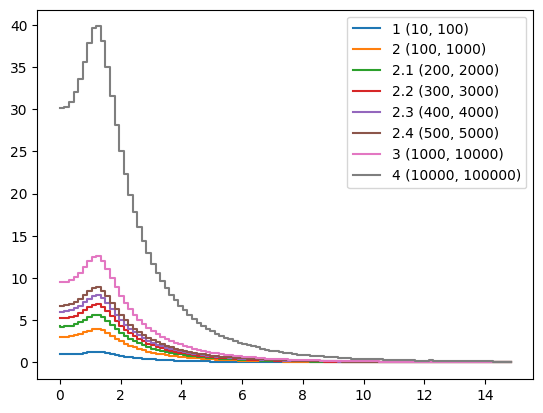

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.363213,0.0469801,3.63213,4.69801,1.25845,1.35029,9
2,100,1000,0.363213,0.0469801,36.3213,46.9801,3.97956,1.35029,9
2.1,200,2000,0.363213,0.0469801,72.6426,93.9601,5.62795,1.35029,9
2.2,300,3000,0.363213,0.0469801,108.964,140.94,6.8928,1.35029,9
2.3,400,4000,0.363213,0.0469801,145.285,187.92,7.95912,1.35029,9
2.4,500,5000,0.363213,0.0469801,181.606,234.9,8.89857,1.35029,9
3,1000,10000,0.363213,0.0469801,363.213,469.801,12.5845,1.35029,9
4,10000,100000,0.363213,0.0469801,3632.13,4698.01,39.7956,1.35029,9


In [61]:
scenarios = { "1": (10,100), 
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(df_sig,df_bkg,"M_TR_2",scenarios)

In [62]:
my_obs= ['MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

MET


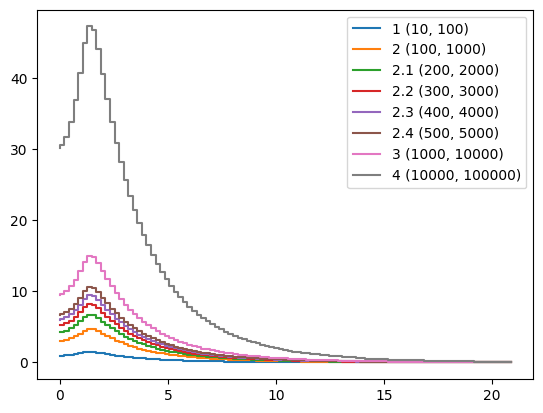

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.349463,0.0198365,3.49463,1.98365,1.49307,1.47506,7
2,100,1000,0.349463,0.0198365,34.9463,19.8365,4.72149,1.47506,7
2.1,200,2000,0.349463,0.0198365,69.8926,39.673,6.6772,1.47506,7
2.2,300,3000,0.349463,0.0198365,104.839,59.5095,8.17786,1.47506,7
2.3,400,4000,0.349463,0.0198365,139.785,79.346,9.44298,1.47506,7
2.4,500,5000,0.349463,0.0198365,174.732,99.1825,10.5576,1.47506,7
3,1000,10000,0.349463,0.0198365,349.463,198.365,14.9307,1.47506,7
4,10000,100000,0.349463,0.0198365,3494.63,1983.65,47.2149,1.47506,7


MET_phi


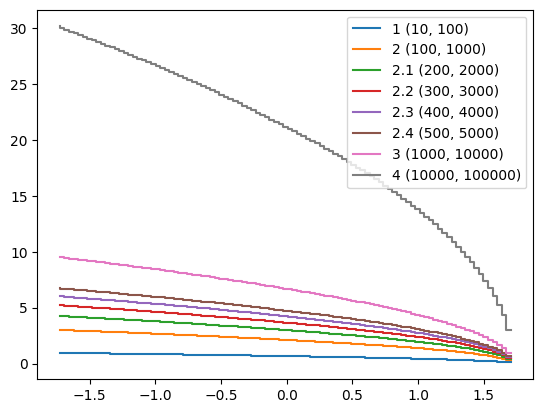

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,-1.72712,0
2,100,1000,1,1,100,1000,3.01511,-1.72712,0
2.1,200,2000,1,1,200,2000,4.26401,-1.72712,0
2.2,300,3000,1,1,300,3000,5.22233,-1.72712,0
2.3,400,4000,1,1,400,4000,6.03023,-1.72712,0
2.4,500,5000,1,1,500,5000,6.742,-1.72712,0
3,1000,10000,1,1,1000,10000,9.53463,-1.72712,0
4,10000,100000,1,1,10000,100000,30.1511,-1.72712,0


MET_rel


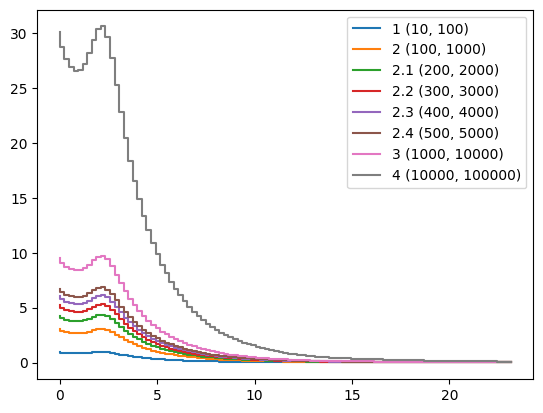

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.142159,0.00731554,1.42159,0.731554,0.96881,2.33864,10
2,100,1000,0.142159,0.00731554,14.2159,7.31554,3.06365,2.33864,10
2.1,200,2000,0.142159,0.00731554,28.4319,14.6311,4.33265,2.33864,10
2.2,300,3000,0.142159,0.00731554,42.6478,21.9466,5.30639,2.33864,10
2.3,400,4000,0.142159,0.00731554,56.8637,29.2621,6.12729,2.33864,10
2.4,500,5000,0.142159,0.00731554,71.0797,36.5777,6.85052,2.33864,10
3,1000,10000,0.142159,0.00731554,142.159,73.1554,9.6881,2.33864,10
4,10000,100000,0.142159,0.00731554,1421.59,731.554,30.6365,2.33864,10


axial_MET


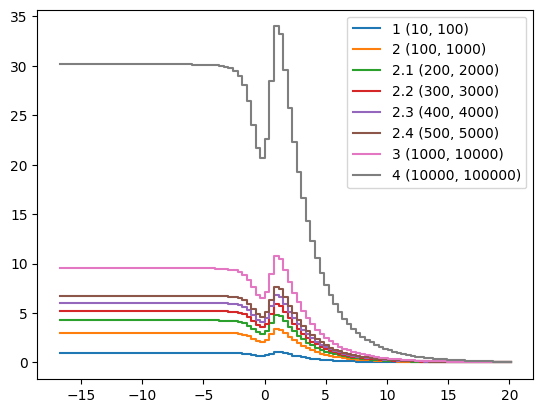

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.160196,0.00620536,1.60196,0.620536,1.07456,1.1405,48
2,100,1000,0.160196,0.00620536,16.0196,6.20536,3.39806,1.1405,48
2.1,200,2000,0.160196,0.00620536,32.0391,12.4107,4.80558,1.1405,48
2.2,300,3000,0.160196,0.00620536,48.0587,18.6161,5.88561,1.1405,48
2.3,400,4000,0.160196,0.00620536,64.0783,24.8214,6.79611,1.1405,48
2.4,500,5000,0.160196,0.00620536,80.0978,31.0268,7.59829,1.1405,48
3,1000,10000,0.160196,0.00620536,160.196,62.0536,10.7456,1.1405,48
4,10000,100000,0.160196,0.00620536,1601.96,620.536,33.9806,1.1405,48


M_R


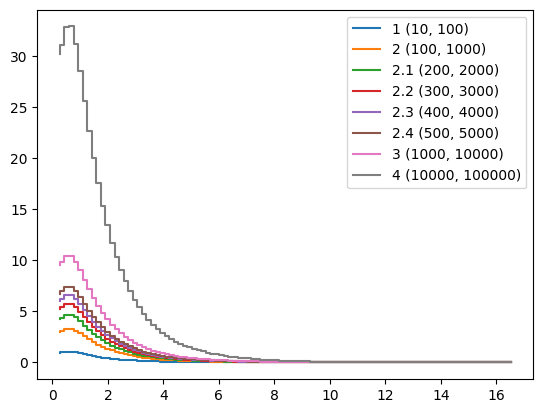

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.731022,0.421495,7.31022,42.1495,1.03945,0.76074,3
2,100,1000,0.731022,0.421495,73.1022,421.495,3.28704,0.76074,3
2.1,200,2000,0.731022,0.421495,146.204,842.99,4.64858,0.76074,3
2.2,300,3000,0.731022,0.421495,219.307,1264.48,5.69332,0.76074,3
2.3,400,4000,0.731022,0.421495,292.409,1685.98,6.57408,0.76074,3
2.4,500,5000,0.731022,0.421495,365.511,2107.47,7.35004,0.76074,3
3,1000,10000,0.731022,0.421495,731.022,4214.95,10.3945,0.76074,3
4,10000,100000,0.731022,0.421495,7310.22,42149.5,32.8704,0.76074,3


M_TR_2


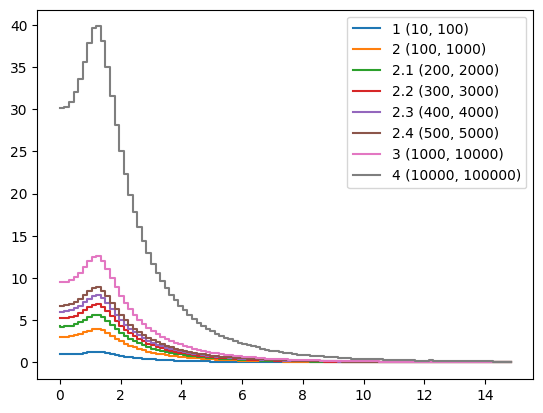

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.363213,0.0469801,3.63213,4.69801,1.25845,1.35029,9
2,100,1000,0.363213,0.0469801,36.3213,46.9801,3.97956,1.35029,9
2.1,200,2000,0.363213,0.0469801,72.6426,93.9601,5.62795,1.35029,9
2.2,300,3000,0.363213,0.0469801,108.964,140.94,6.8928,1.35029,9
2.3,400,4000,0.363213,0.0469801,145.285,187.92,7.95912,1.35029,9
2.4,500,5000,0.363213,0.0469801,181.606,234.9,8.89857,1.35029,9
3,1000,10000,0.363213,0.0469801,363.213,469.801,12.5845,1.35029,9
4,10000,100000,0.363213,0.0469801,3632.13,4698.01,39.7956,1.35029,9


R


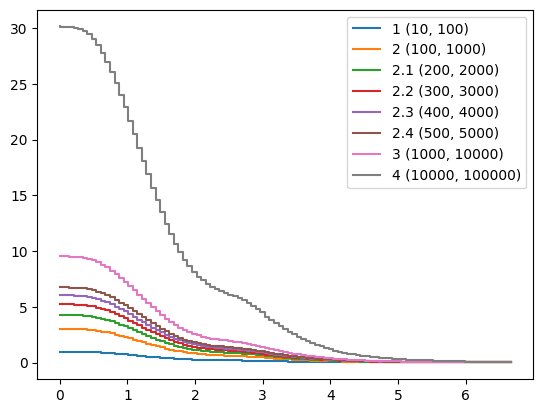

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00204808,0
2,100,1000,1,1,100,1000,3.01511,0.00204808,0
2.1,200,2000,1,1,200,2000,4.26401,0.00204808,0
2.2,300,3000,1,1,300,3000,5.22233,0.00204808,0
2.3,400,4000,1,1,400,4000,6.03023,0.00204808,0
2.4,500,5000,1,1,500,5000,6.742,0.00204808,0
3,1000,10000,1,1,1000,10000,9.53463,0.00204808,0
4,10000,100000,1,1,10000,100000,30.1511,0.00204808,0


MT2


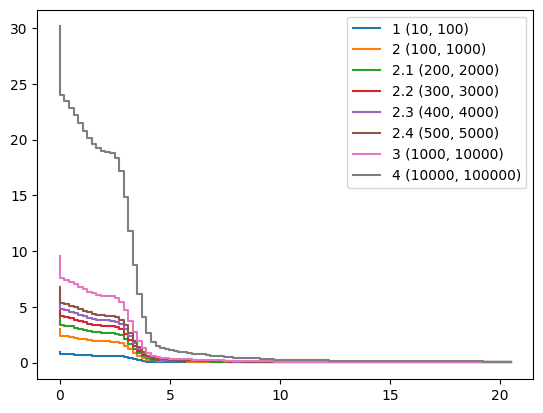

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0,0
2,100,1000,1,1,100,1000,3.01511,0,0
2.1,200,2000,1,1,200,2000,4.26401,0,0
2.2,300,3000,1,1,300,3000,5.22233,0,0
2.3,400,4000,1,1,400,4000,6.03023,0,0
2.4,500,5000,1,1,500,5000,6.742,0,0
3,1000,10000,1,1,1000,10000,9.53463,0,0
4,10000,100000,1,1,10000,100000,30.1511,0,0


S_R


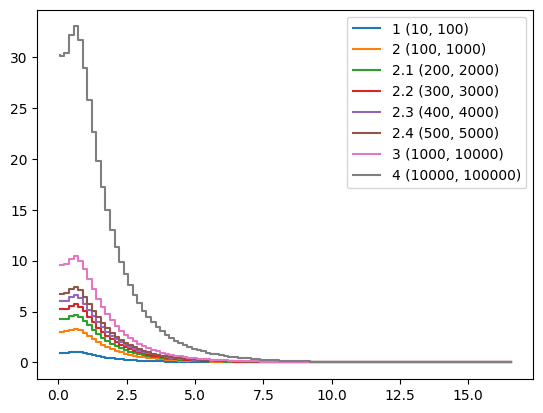

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.777207,0.477283,7.77207,47.7283,1.04325,0.719131,4
2,100,1000,0.777207,0.477283,77.7207,477.283,3.29905,0.719131,4
2.1,200,2000,0.777207,0.477283,155.441,954.566,4.66556,0.719131,4
2.2,300,3000,0.777207,0.477283,233.162,1431.85,5.71412,0.719131,4
2.3,400,4000,0.777207,0.477283,310.883,1909.13,6.5981,0.719131,4
2.4,500,5000,0.777207,0.477283,388.604,2386.41,7.3769,0.719131,4
3,1000,10000,0.777207,0.477283,777.207,4772.83,10.4325,0.719131,4
4,10000,100000,0.777207,0.477283,7772.07,47728.3,32.9905,0.719131,4


M_Delta_R


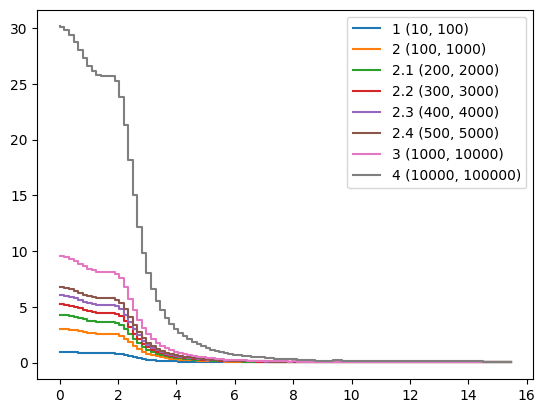

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
2.1,200,2000,1,1,200,2000,4.26401,0.00445562,0
2.2,300,3000,1,1,300,3000,5.22233,0.00445562,0
2.3,400,4000,1,1,400,4000,6.03023,0.00445562,0
2.4,500,5000,1,1,500,5000,6.742,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


dPhi_r_b


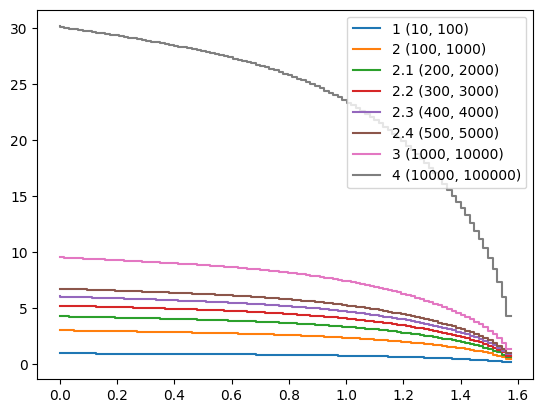

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,2.45273e-06,0
2,100,1000,1,1,100,1000,3.01511,2.45273e-06,0
2.1,200,2000,1,1,200,2000,4.26401,2.45273e-06,0
2.2,300,3000,1,1,300,3000,5.22233,2.45273e-06,0
2.3,400,4000,1,1,400,4000,6.03023,2.45273e-06,0
2.4,500,5000,1,1,500,5000,6.742,2.45273e-06,0
3,1000,10000,1,1,1000,10000,9.53463,2.45273e-06,0
4,10000,100000,1,1,10000,100000,30.1511,2.45273e-06,0


cos_theta_r1


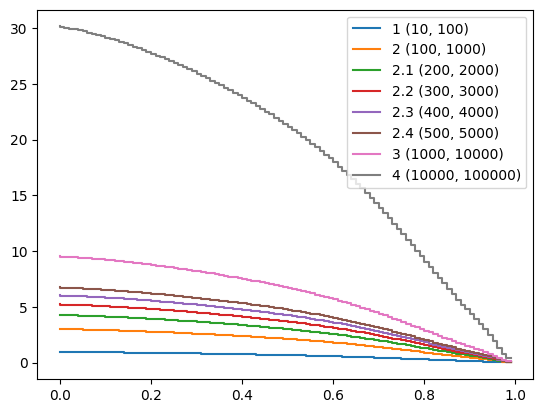

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,1.50257e-07,0
2,100,1000,1,1,100,1000,3.01511,1.50257e-07,0
2.1,200,2000,1,1,200,2000,4.26401,1.50257e-07,0
2.2,300,3000,1,1,300,3000,5.22233,1.50257e-07,0
2.3,400,4000,1,1,400,4000,6.03023,1.50257e-07,0
2.4,500,5000,1,1,500,5000,6.742,1.50257e-07,0
3,1000,10000,1,1,1000,10000,9.53463,1.50257e-07,0
4,10000,100000,1,1,10000,100000,30.1511,1.50257e-07,0


In [63]:
for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)
    

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




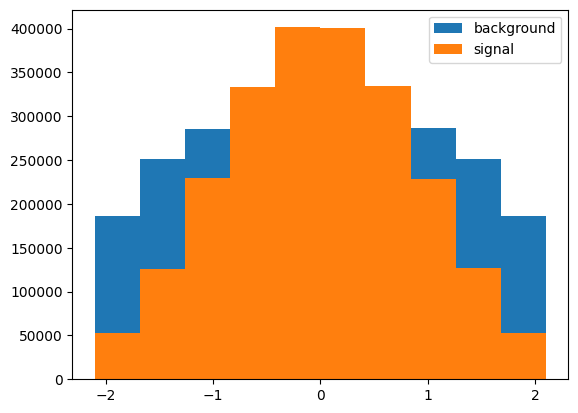

In [30]:
plt.hist(df_bkg["l_1_eta"],label="background")
plt.hist(df_sig["l_1_eta"],label="signal")
plt.legend()

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



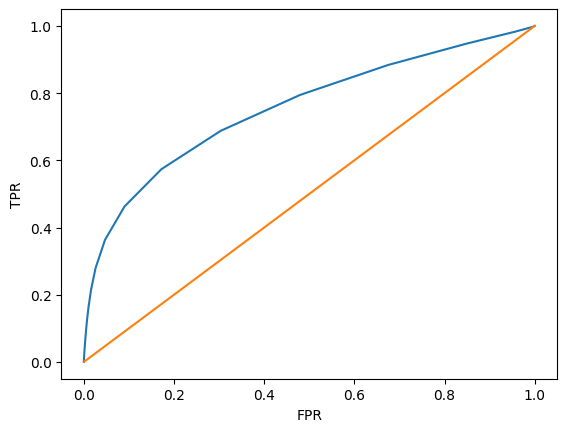

In [31]:
#from lecture
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1])

In [32]:
TPR

array([1.00000000e+00, 9.97180294e-01, 9.82933587e-01, 9.46986813e-01,
       8.83743395e-01, 7.94605099e-01, 6.87818179e-01, 5.73554294e-01,
       4.62589173e-01, 3.63212778e-01, 2.80231853e-01, 2.13863199e-01,
       1.62761433e-01, 1.24420247e-01, 9.56873050e-02, 7.43408483e-02,
       5.81717936e-02, 4.60275187e-02, 3.67606467e-02, 2.95079130e-02,
       2.39060908e-02, 1.95416874e-02, 1.60095147e-02, 1.31994246e-02,
       1.09562480e-02, 9.08198041e-03, 7.62382820e-03, 6.37198529e-03,
       5.33869038e-03, 4.50514834e-03, 3.78918511e-03, 3.19779424e-03,
       2.72791605e-03, 2.32360227e-03, 1.97785934e-03, 1.69025018e-03,
       1.45246996e-03, 1.25359129e-03, 1.08181257e-03, 9.26206396e-04,
       7.99011464e-04, 6.89300371e-04, 6.02318270e-04, 5.29323240e-04,
       4.58076594e-04, 3.92075100e-04, 3.32630046e-04, 2.92417215e-04,
       2.59197920e-04, 2.25541529e-04, 2.01938346e-04, 1.77023875e-04,
       1.53857787e-04, 1.33751372e-04, 1.18890108e-04, 1.06651421e-04,
      

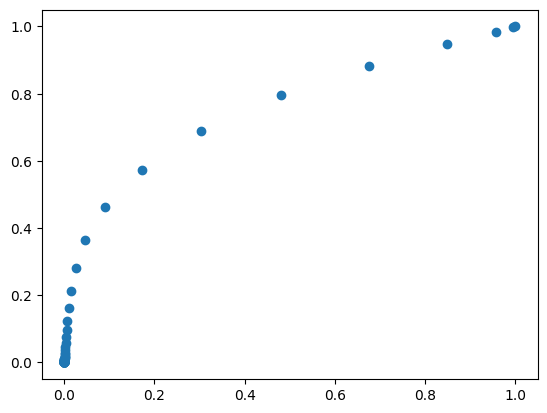

In [33]:
plt.scatter(FPR,TPR)

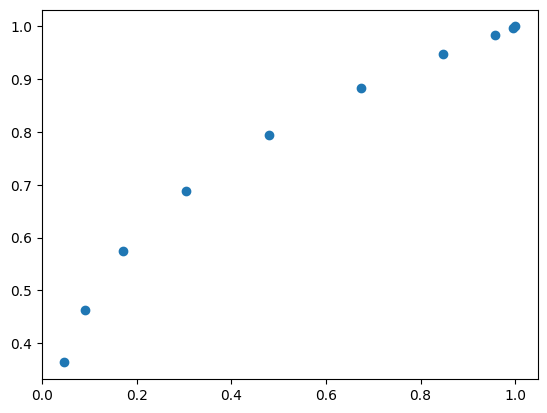

In [34]:
plt.scatter(FPR[:10],TPR[:10])

In [35]:
#from lecture
def AUC(TPR,FPR):
    n = FPR.shape[0]
    return np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2)

AUC(TPR,FPR)

0.755055006241215

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [36]:
#didn't understand at first so when showed in lecture i replicated it on my own and typed it out to try to gain some understanding

In [37]:
df_sig

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,1.0,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,1.0,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.0,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [38]:
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

df_sig_0

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [39]:
m_s= np.mean(df_sig_0,axis=0)
m_s

l_1_pT          1.290233
l_1_eta        -0.000336
l_1_phi        -0.000553
l_2_pT          1.138185
l_2_eta         0.000378
l_2_phi        -0.000128
MET             1.417029
MET_phi         0.000155
MET_rel         1.275509
axial_MET       0.084007
M_R             1.182889
M_TR_2          1.268996
R               1.057301
MT2             1.074723
S_R             1.174697
M_Delta_R       1.185596
dPhi_r_b        1.014991
cos_theta_r1    0.282560
dtype: float64

In [40]:
m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

delta = m_s-m_b
delta

l_1_pT          0.534471
l_1_eta        -0.000660
l_1_phi        -0.000928
l_2_pT          0.255800
l_2_eta         0.000765
l_2_phi        -0.000199
MET             0.768856
MET_phi         0.000220
MET_rel         0.505262
axial_MET       0.154960
M_R             0.336500
M_TR_2          0.495985
R               0.105791
MT2             0.136978
S_R             0.321855
M_Delta_R       0.341800
dPhi_r_b        0.028585
cos_theta_r1    0.106272
dtype: float64

In [41]:
delta.shape
delta.transpose().shape

(18,)

In [42]:
np.matrix(delta).shape
np.matrix(delta).transpose().shape
delta=np.matrix(m_s-m_b).transpose()

In [43]:
S_B= delta*delta.transpose()
S_B

matrix([[ 2.85659103e-01, -3.52809644e-04, -4.96156489e-04,
          1.36717519e-01,  4.08806287e-04, -1.06310408e-04,
          4.10931386e-01,  1.17828594e-04,  2.70047689e-01,
          8.28218385e-02,  1.79849669e-01,  2.65089747e-01,
          5.65419449e-02,  7.32109964e-02,  1.72022353e-01,
          1.82682327e-01,  1.52779431e-02,  5.67995029e-02],
        [-3.52809644e-04,  4.35745417e-07,  6.12789134e-07,
         -1.68856020e-04, -5.04905320e-07,  1.31301040e-07,
         -5.07529970e-04, -1.45526832e-07, -3.33528420e-04,
         -1.02290958e-04, -2.22127344e-04, -3.27405003e-04,
         -6.98333898e-05, -9.04208734e-05, -2.12460043e-04,
         -2.25625882e-04, -1.88693643e-05, -7.01514925e-05],
        [-4.96156489e-04,  6.12789134e-07,  8.61765858e-07,
         -2.37462358e-04, -7.10048762e-07,  1.84648760e-07,
         -7.13739809e-04, -2.04654502e-07, -4.69041288e-04,
         -1.43851858e-04, -3.12377864e-04, -4.60429922e-04,
         -9.82067528e-05, -1.27158948e

In [44]:
S_B.shape

(18, 18)

In [45]:
df_sig_0-m_s

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,0.377740,0.064527,-1.224618,-0.632083,-0.339317,1.672670,2.058436,-1.219291,-1.262554,3.691167,-0.136912,-0.700944,-0.575372,-1.074723,-0.726287,-0.980241,0.306903,0.095024
2,-0.845393,-0.133962,-0.709418,-0.686466,-1.614249,-0.768533,-0.197111,0.503871,0.555739,-0.515392,-0.656606,-0.327482,0.530234,0.949585,-0.571200,0.376778,0.120464,-0.101650
3,-0.908977,-0.975809,0.693706,-0.689226,0.891375,-0.677201,0.616031,1.532886,1.770751,-1.089292,-0.613503,-0.253784,0.524916,0.477191,-0.413482,0.529867,0.477266,-0.191841
4,0.019763,-0.689753,-0.675706,0.451098,-0.693703,0.623035,-0.329467,-0.381897,-0.686304,1.281472,-0.003594,-0.300777,-0.328738,-1.074723,-0.091540,-1.142167,0.139863,-0.187701
8,0.822579,0.743319,-0.329986,-0.332932,-0.029265,-1.446551,0.882917,1.450274,1.713602,-1.978777,0.262235,1.279171,0.507420,1.318909,0.379869,0.962872,0.164126,0.405497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,-0.339115,-1.024784,0.736309,-0.065743,-1.268792,-1.365250,-0.920987,-1.378906,-1.248063,0.157192,-0.341678,-0.542985,-0.291436,-1.074723,-0.357870,-0.885477,-0.256432,-0.022887
4999988,0.749568,0.851638,0.125782,-0.204041,0.551300,-0.811171,0.185733,-0.852668,-1.066474,0.328383,0.188064,0.315094,-0.031946,-0.872283,-0.071867,-0.580399,-0.275588,0.329626
4999991,-0.258532,0.648347,-1.616156,-0.605273,1.662669,-1.243679,-0.710289,0.189760,-0.841952,-0.477309,-0.373259,-0.181777,0.134344,0.897640,-0.476684,0.378604,-0.979630,0.221877
4999995,-0.436908,-0.961446,-1.486724,-0.459995,0.493202,1.648097,0.426838,0.276799,-0.250404,-1.570542,-0.290010,0.415433,0.616784,2.291575,-0.127990,1.461053,0.374235,0.082039


In [46]:
delta_s=np.matrix(df_sig_0-m_s).transpose()
delta_s.shape

(18, 2287827)

In [47]:
S_W_s= delta_s*delta_s.transpose()
S_W_s.shape

(18, 18)

In [48]:
delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()
S_W_b.shape

(18, 18)

In [49]:
S_W=S_W_s+S_W_b
S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()

w

matrix([[-2.22390835e-07],
        [ 8.57659003e-11],
        [ 4.28968811e-10],
        [-1.04470564e-07],
        [-2.23120185e-10],
        [ 3.46417932e-11],
        [-1.64461728e-07],
        [-3.92336412e-10],
        [-1.41650463e-08],
        [-2.72305213e-08],
        [ 2.57069538e-08],
        [-1.09420028e-08],
        [ 2.07602288e-07],
        [ 3.38231687e-08],
        [ 1.84539798e-07],
        [-1.71289091e-07],
        [ 8.89905919e-09],
        [-5.16133749e-07]])

In [50]:
w_1 = w / sum(w)
w_1

matrix([[ 2.88602495e-01],
        [-1.11300688e-04],
        [-5.56684224e-04],
        [ 1.35574227e-01],
        [ 2.89548993e-04],
        [-4.49555754e-05],
        [ 2.13426354e-01],
        [ 5.09145386e-04],
        [ 1.83823569e-02],
        [ 3.53377710e-02],
        [-3.33605969e-02],
        [ 1.41997278e-02],
        [-2.69411004e-01],
        [-4.38932247e-02],
        [-2.39482198e-01],
        [ 2.22286404e-01],
        [-1.15485455e-02],
        [ 6.69800479e-01]])

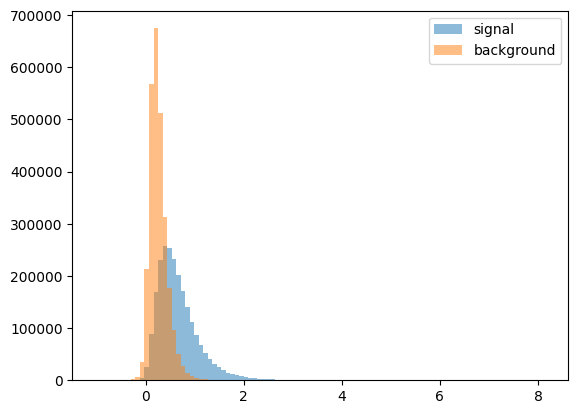

In [51]:
output_s=np.matrix(df_sig_0)*w_1
output_b=np.matrix(df_bkg_0)*w_1

h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()